## Set up 

In [1]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

# Plot styling
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Importing data

In [2]:
agg_c_survey_10_1_12 = pd.read_csv("data/csvs/Agg_C_Survey_10_1_12.csv")
CEO_CLT = pd.read_csv("data/csvs/CEO_CLT.csv")
C_survey_all_data = pd.read_csv("data/csvs/C_Survey_All_Data_06_23_11Revised.csv")
D_Survey_All = pd.read_csv("data/csvs/D_Survey_All_Data_06_23_11Revised.csv")
E_Survey_All = pd.read_csv("data/csvs/E Survey All Data - 06 22 11RECODED.csv")
Phoenix_CEO_Book = pd.read_csv("data/csvs/Phoenix GLOBE CEO Book 3 May 2011.csv")

In [3]:
Phoenix_CEO_Book

,uniorg,Couname,cluster,PH3COUNTRY,PH2Country,industry,org,ceocode,entrepre,commit_ind_c,...,chi_status,chi_male,chi_team2int,chi_conflict,chichar2d,chiteam2d,chinrcis2d,chiparti2d,chihum2d,auton2d
1,31001,Azerbaijan ...,...,31.0,-99.0,541.0,1.0,1.5,2.0,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31002,Azerbaijan ...,...,31.0,-99.0,443.0,2.0,1.5,2.0,4.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31003,Azerbaijan ...,...,31.0,-99.0,324.0,3.0,1.5,1.0,5.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31004,Azerbaijan ...,...,31.0,-99.0,324.0,4.0,1.5,2.0,4.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,31005,Azerbaijan ...,...,31.0,-99.0,325.0,5.0,1.5,2.0,4.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,31006,Azerbaijan ...,...,31.0,-99.0,444.0,6.0,1.5,1.0,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,31007,Azerbaijan ...,...,31.0,-99.0,524.0,7.0,1.5,2.0,6.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,31008,Azerbaijan ...,...,31.0,-99.0,233.0,8.0,1.5,1.0,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,31009,Azerbaijan ...,...,31.0,-99.0,444.0,9.0,1.5,2.0,5.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,31010,Azerbaijan ...,...,31.0,-99.0,514.0,10.0,1.5,1.0,5.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning Data

In [14]:
# Based on the item composition guide, selecting the columns that are useful to us.
CSurveyCleaned = C_survey_all_data[['Couname', 'org', 'uniorg', 
                   'ceocode', 'entrepre', 'promoted', 'link', 'C1', 'C23', 
                   'C20', 'C31', 'C35','C65', 'C80', 'C9', 'C81', 'C74', 
                   'C17', 'C25', 'C52', 'C56', 'C78', 'C79', 'C29', 
                   'C73', 'C76', 'C32', 'C37', 'C49', 'C72', 'C83', 
                   'C45', 'C50', 'C53', 'C66', 'C69', 'C71', 'C21', 
                   'C54', 'C11', 'C12', 'C30', 'C58', 'C75', 'C48', 
                   'C46', 'C51', 'C4', 'C39', 'C5', 'C8', 'C34', 'C44', 
                   'C77', 'C42', 'C61', 'C36', 'C41', 'C43', 'C82', 'C6', 
                   'C60', 'C10', 'C15', 'C40', 'C28', 'C27', 'C33', 'C59', 
                   'C16', 'C19', 'C26', 'C64', 'C67', 'C88', 'C90', 'C94', 
                   'C87', 'C95', 'C96', 'C86', 'C89', 'C92', 'C93', 'C1', 'C22', 
                   'C14', 'C55', 'C2', 'C68', 'C84', 'C85']].fillna(CSurveyCleaned.mean())

DSurveyCleaned = D_Survey_All[['couname', 'org', 'uniorg', 'ceocode', 'link', 
                              'entrepre', 'promoted', 'D21', 'D39', 'D50', 
                              'D85', 'D53', 'D55', 'D69', 'D70', 'D71', 
                              'D8', 'D26', 'D27', 'D67', 'D44', 'D45', 'D46', 'D24', 
                              'D9', 'D42', 'D78', 'D28', 'D60', 'D84', 'D30', 
                              'D38', 'D49', 'D66', 'D14', 'D3', 'D4', 'D18', 'D74', 
                              'D12', 'D1', 'D6', 'D11', 'D5', 'D29', 'D16', 'D79', 
                              'D31', 'D10', 'D59', 'D22', 'D41', 'D48', 'D33', 'D72', 
                              'D54', 'D58', 'D15', 'D25', 'D61', 'D2', 'D89', 'D91', 'D95', 
                              'D88', 'D87', 'D96', 'D97', 'D90', 'D93', 'D94', 'D47', 'D63', 
                              'D52', 'D62', 'D57', 'D75', 'D77', 'D43', 'D76', 'D23', 'D36', 
                              'D73', 'D64', 'D65', 'D68', 'D80', 'D51', 'D86', 'D35', 'D82', 
                              'D56']].fillna(DSurveyCleaned.mean())

DSurveyCleaned.head()

,couname,org,uniorg,ceocode,link,entrepre,promoted,D21,D39,D50,...,D73,D64,D65,D68,D80,D51,D86,D35,D82,D56
1,Azerbaijan ...,1,31001,1,310011,2.0,1.0,4.0,1.0,3.0,...,6.0,6.0,6.0,6.0,5.0,4.0,5.0,6.0,6.0,6.0
2,Azerbaijan ...,1,31001,2,310012,2.0,1.0,3.0,1.0,2.0,...,5.0,6.0,6.0,6.0,6.0,5.0,4.0,5.0,5.0,5.0
3,Azerbaijan ...,2,31002,1,310021,2.0,1.0,2.0,2.0,2.0,...,6.0,5.0,5.0,5.0,6.0,4.0,4.0,5.0,5.0,5.0
4,Azerbaijan ...,2,31002,2,310022,2.0,1.0,3.0,1.0,3.0,...,6.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,6.0,5.0
5,Azerbaijan ...,3,31003,1,310031,1.0,1.0,3.0,3.0,3.0,...,4.0,5.0,6.0,7.0,6.0,1.0,3.0,6.0,3.0,5.0


## Beginning some analysis stuffs.

In [15]:
# Grouping by country, what do we have here?
C_Grouped_Country_Avg = CSurveyCleaned[['Couname', 'C1', 'C23', 
                   'C20', 'C31', 'C35', 'C65', 'C80', 'C9', 'C81', 'C74', 
                   'C17', 'C25', 'C52', 'C56', 'C78', 'C79', 'C29', 
                   'C73', 'C76', 'C32', 'C37', 'C49', 'C72', 'C83', 
                   'C45', 'C50', 'C53', 'C66', 'C69', 'C71', 'C21', 
                   'C54', 'C11', 'C12', 'C30', 'C58', 'C75', 'C48', 
                   'C46', 'C51', 'C4', 'C39', 'C5', 'C8', 'C34', 'C44', 
                   'C77', 'C42', 'C61', 'C36', 'C41', 'C43', 'C82', 'C6', 
                   'C60', 'C10', 'C15', 'C40', 'C28', 'C27', 'C33', 'C59', 
                   'C16', 'C19', 'C26', 'C64', 'C67', 'C88', 'C90', 'C94', 
                   'C87', 'C95', 'C96', 'C86', 'C89', 'C92', 'C93', 'C1', 'C22', 
                   'C14', 'C55', 'C2', 'C68', 'C84', 'C85']].groupby("Couname").mean()
D_Grouped_Country_Avg = DSurveyCleaned[['couname', 'D21', 'D39', 'D50', 
                              'D85', 'D53', 'D55', 'D69', 'D70', 'D71', 
                              'D8', 'D26', 'D27', 'D67', 'D44', 'D45', 'D46', 'D24', 
                              'D9', 'D42', 'D78', 'D28', 'D60', 'D84', 'D30', 
                              'D38', 'D49', 'D66', 'D14', 'D3', 'D4', 'D18', 'D74', 
                              'D12', 'D1', 'D6', 'D11', 'D5', 'D29', 'D16', 'D79', 
                              'D31', 'D10', 'D59', 'D22', 'D41', 'D48', 'D33', 'D72', 
                              'D54', 'D58', 'D15', 'D25', 'D61', 'D2', 'D89', 'D91', 'D95', 
                              'D88', 'D87', 'D96', 'D97', 'D90', 'D93', 'D94', 'D47', 'D63', 
                              'D52', 'D62', 'D57', 'D75', 'D77', 'D43', 'D76', 'D23', 'D36', 
                              'D73', 'D64', 'D65', 'D68', 'D80', 'D51', 'D86', 'D35', 'D82', 
                              'D56']].groupby("couname").mean()


In [16]:
# drop fiji 
C_Grouped_Country_Avg['GDP'] = [43754, 16433, 14858, 12559, 25977, 0, 44565, 
                                24273, 6913, 5372, 5372, 5372, 15838, 46241,
                                5443, 10942, 18719, 22542, 28110, 0, 31620, 
                                20912, 0, 18651, 52676, 0]
                                
C_Grouped_Country_Avg['GEI'] = [66, 30.5, 20.3, 41.1, 54.8, 0, 65.9, 37.1, 
                               18.5, 28.4, 28.4, 28.4, 26.4, 68.1, 19.7, 28.4, 
                               38.2, 25.2,53.8,0,  45.3, 59.5, 0, 44.5, 83.6,0]

D_Grouped_Country_Avg['GDP'] = [43754, 16433, 14858, 12559, 25977, 0, 44565, 
                                24273, 6913, 5372, 5372, 5372, 15838, 46241,
                                5443, 10942, 18719, 22542,28110, 0, 31620, 
                                20912, 0, 18651, 52676, 0]
                                
D_Grouped_Country_Avg['GEI'] = [66, 30.5, 20.3, 41.1, 54.8, 0, 65.9, 37.1, 
                               18.5, 28.4, 28.4, 28.4, 26.4, 68.1, 19.7, 28.4, 
                               38.2, 25.2, 53.8, 0, 45.3, 59.5, 0, 44.5, 83.6,0]


### We're going off of the Item Composition Guide referenced in the repository here. Will analyze individual categories such as autocraticity, participation, modesty, charisma (risk tolerance, convincing-ness, self-sacrificial), collectivistic, decisiveness, diplomatic, face saver, visionary, and more....

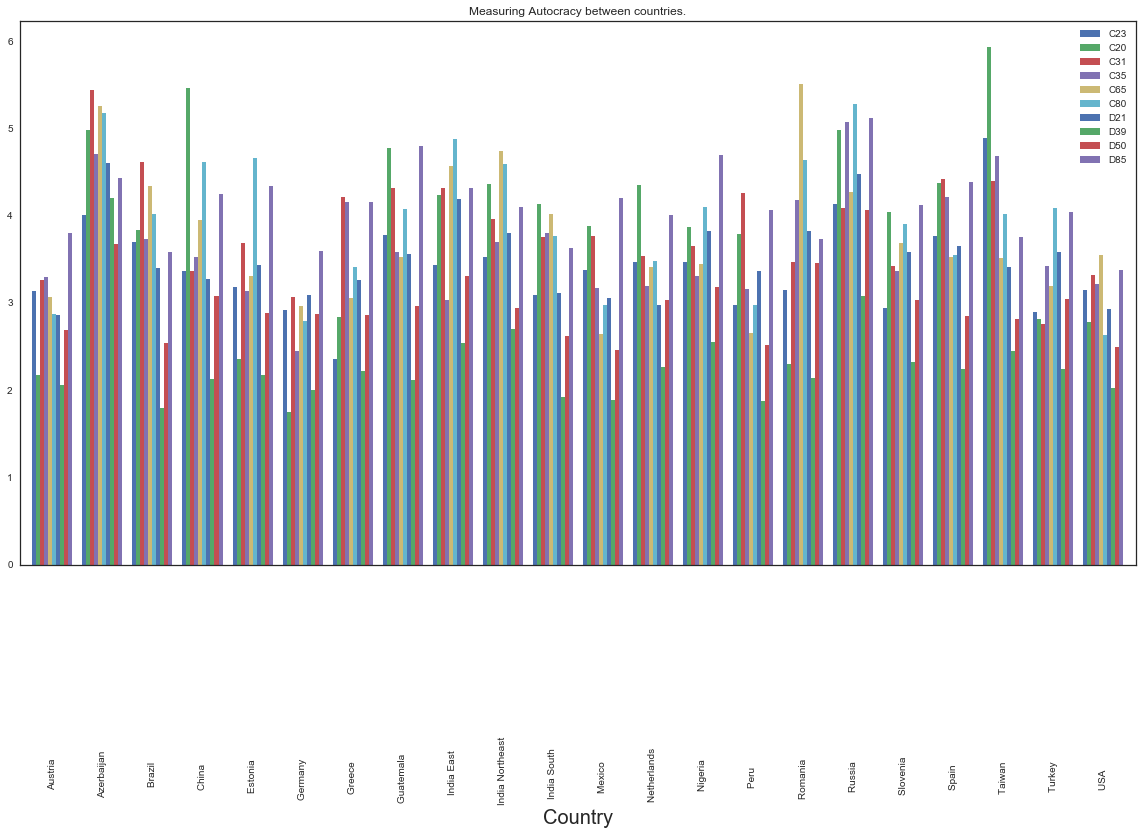

In [17]:
# Autocratic
autocratic_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C23', 'C20', 'C31', 'C35', 'C65', 'C80']]
autocratic_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D21', 'D39', 'D50', 'D85']]
autocratic_D.rename(columns={"couname":"Couname"},inplace=True)
autocrat = pd.merge(autocratic_C, autocratic_D)
autocrat.set_index("Couname", inplace=True)
autocrat.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Autocracy between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

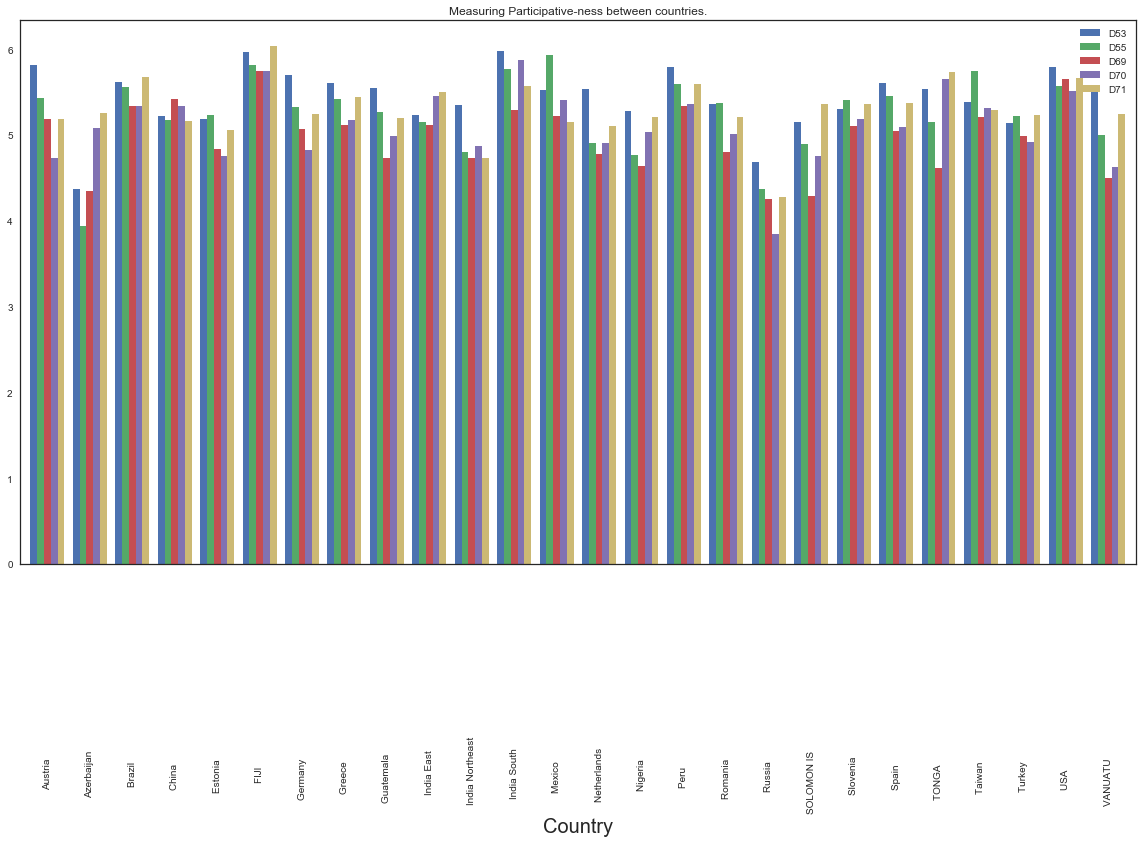

In [18]:
# Participative
Participative = D_Grouped_Country_Avg.reset_index()[['couname', 'D53', 'D55', 'D69', 'D70', 'D71']]
Participative.set_index("couname", inplace=True)
Participative.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Participative-ness between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

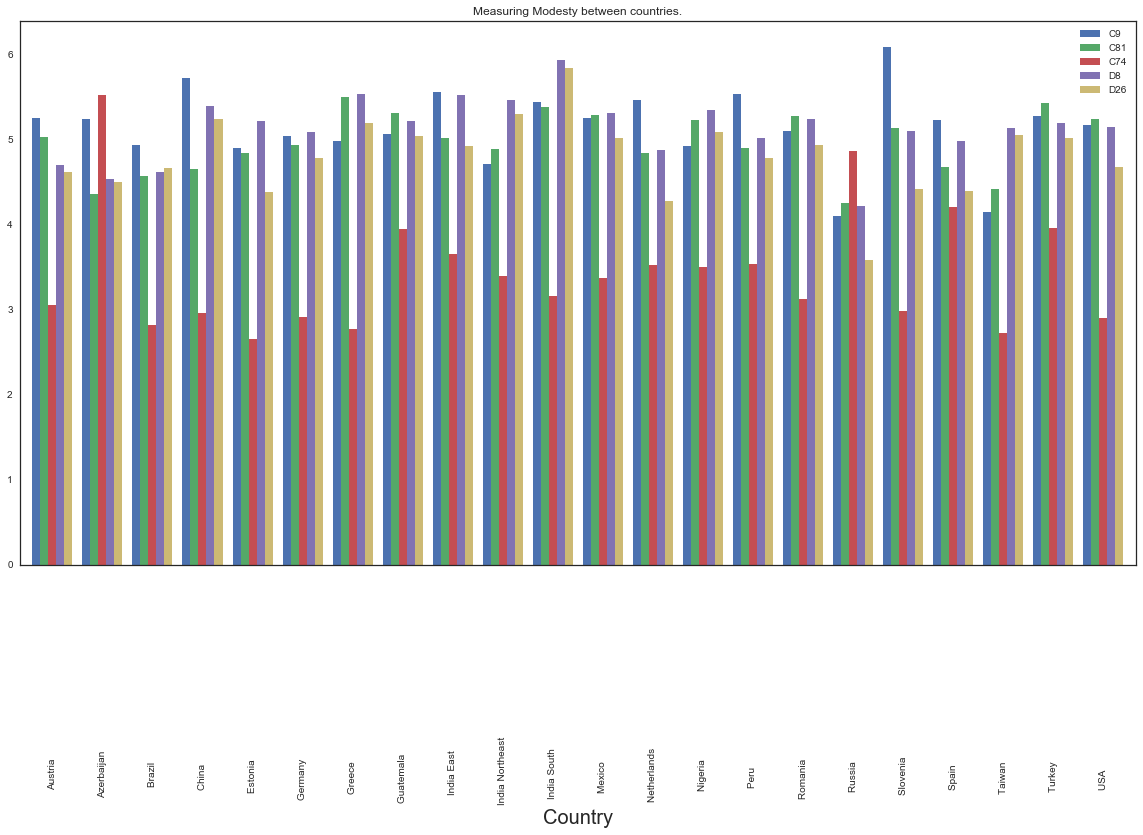

In [19]:
# Modesty
Modesty_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C9', 'C81', 'C74']]
Modesty_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D8', 'D26']]
Modesty_D.rename(columns={"couname":"Couname"},inplace=True)
Modesty = pd.merge(Modesty_C, Modesty_D)
Modesty.set_index("Couname", inplace=True)
Modesty.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Modesty between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

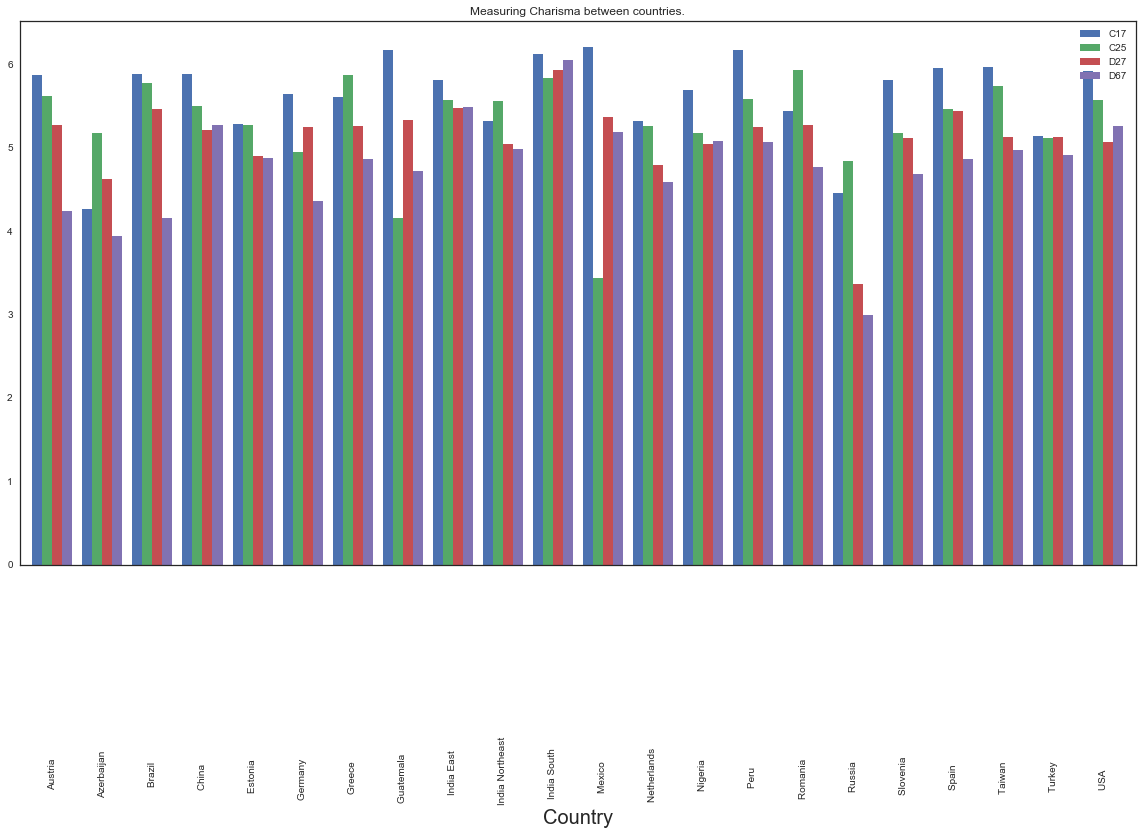

In [20]:
# Charisma
Charisma_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C17', 'C25']]
Charisma_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D27', 'D67']]
Charisma_D.rename(columns={"couname":"Couname"},inplace=True)
Charisma = pd.merge(Charisma_C, Charisma_D)
Charisma.set_index("Couname", inplace=True)
Charisma.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Charisma between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

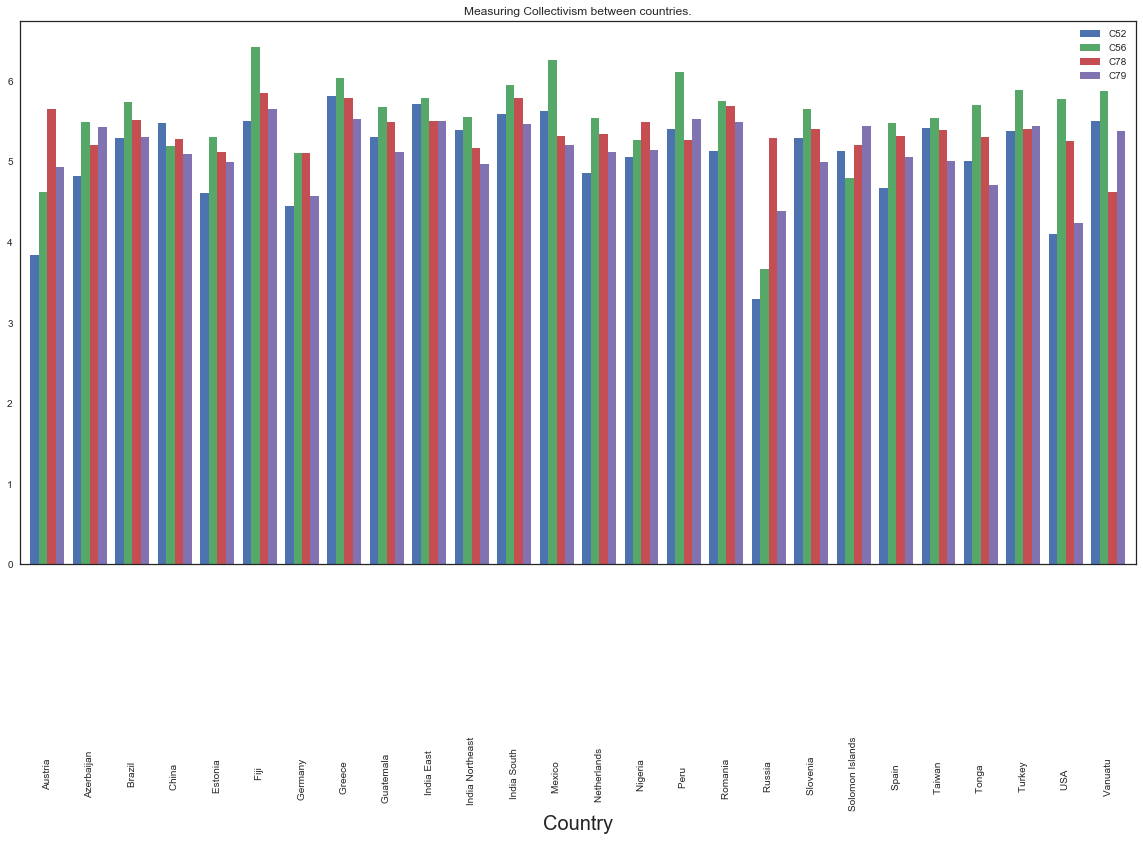

In [21]:
# Collectivism
Collectivism = C_Grouped_Country_Avg.reset_index()[['Couname', 'C52', 'C56', 'C78', 'C79']]
Collectivism.set_index("Couname", inplace=True)
Collectivism.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Collectivism between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

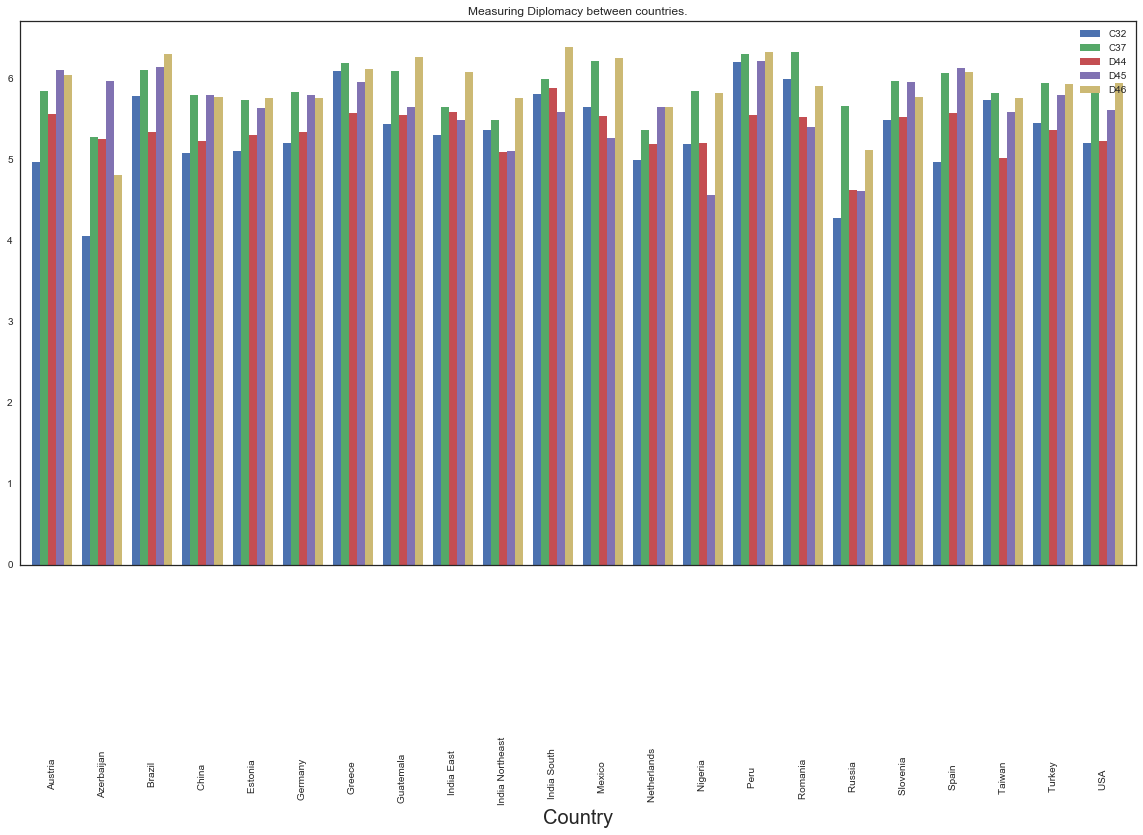

In [22]:
# Diplomacy
Diplomacy_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C32', 'C37']]
Diplomacy_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D44', 'D45', 'D46']]
Diplomacy_D.rename(columns={"couname":"Couname"},inplace=True)
Diplomacy = pd.merge(Diplomacy_C, Diplomacy_D)
Diplomacy.set_index("Couname", inplace=True)
Diplomacy.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Diplomacy between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

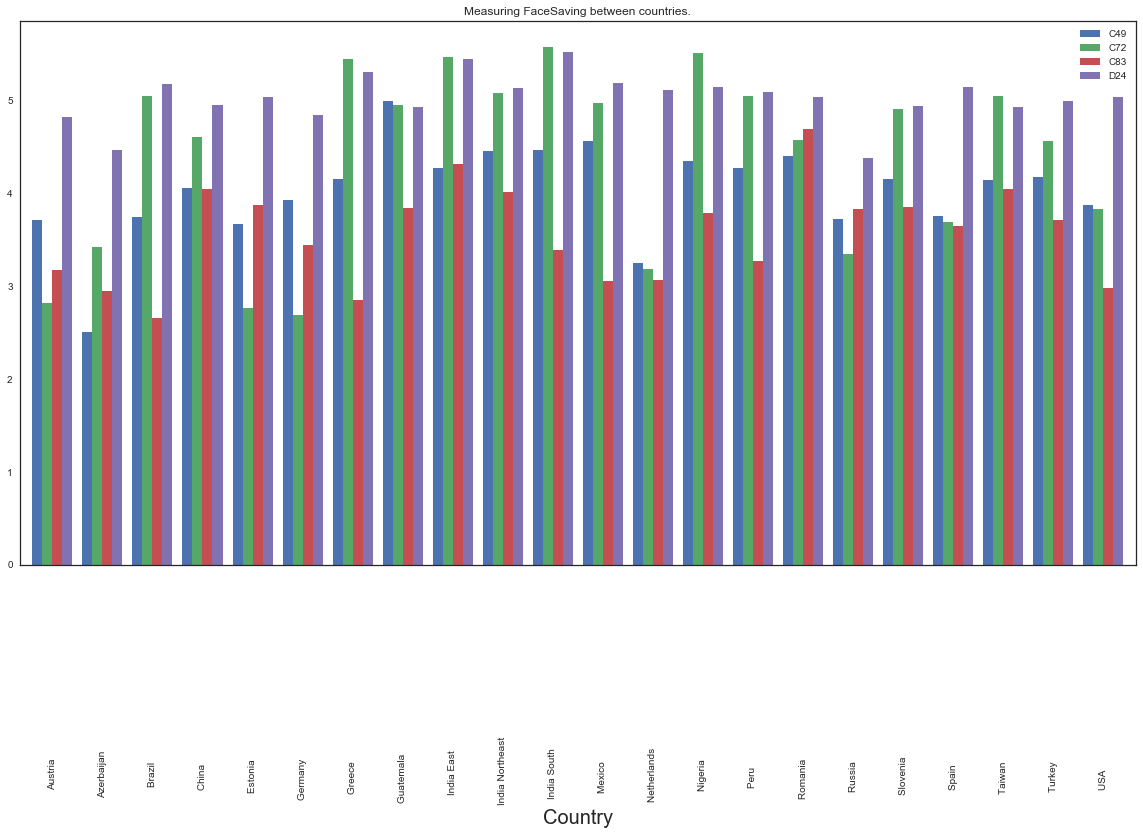

In [23]:
# "Face Saving"
FaceSaving_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C49', 'C72', 'C83']]
FaceSaving_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D24']]
FaceSaving_D.rename(columns={"couname":"Couname"},inplace=True)
FaceSaving = pd.merge(FaceSaving_C, FaceSaving_D)
FaceSaving.set_index("Couname", inplace=True)
FaceSaving.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring FaceSaving between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

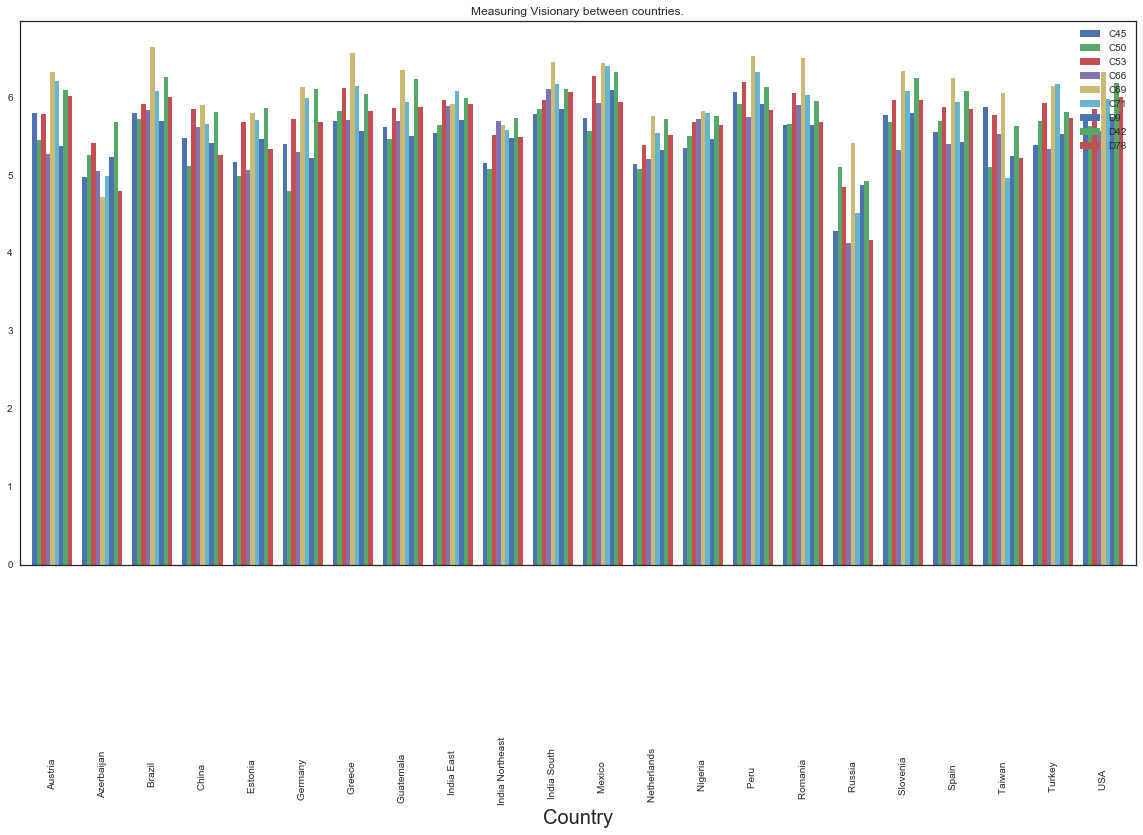

In [24]:
# "Visionary"
Visionary_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C45', 'C50', 'C53', 'C66', 'C69', 'C71']]
Visionary_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D9', 'D42', 'D78']]
Visionary_D.rename(columns={"couname":"Couname"},inplace=True)
Visionary = pd.merge(Visionary_C, Visionary_D)
Visionary.set_index("Couname", inplace=True)
Visionary.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Visionary between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

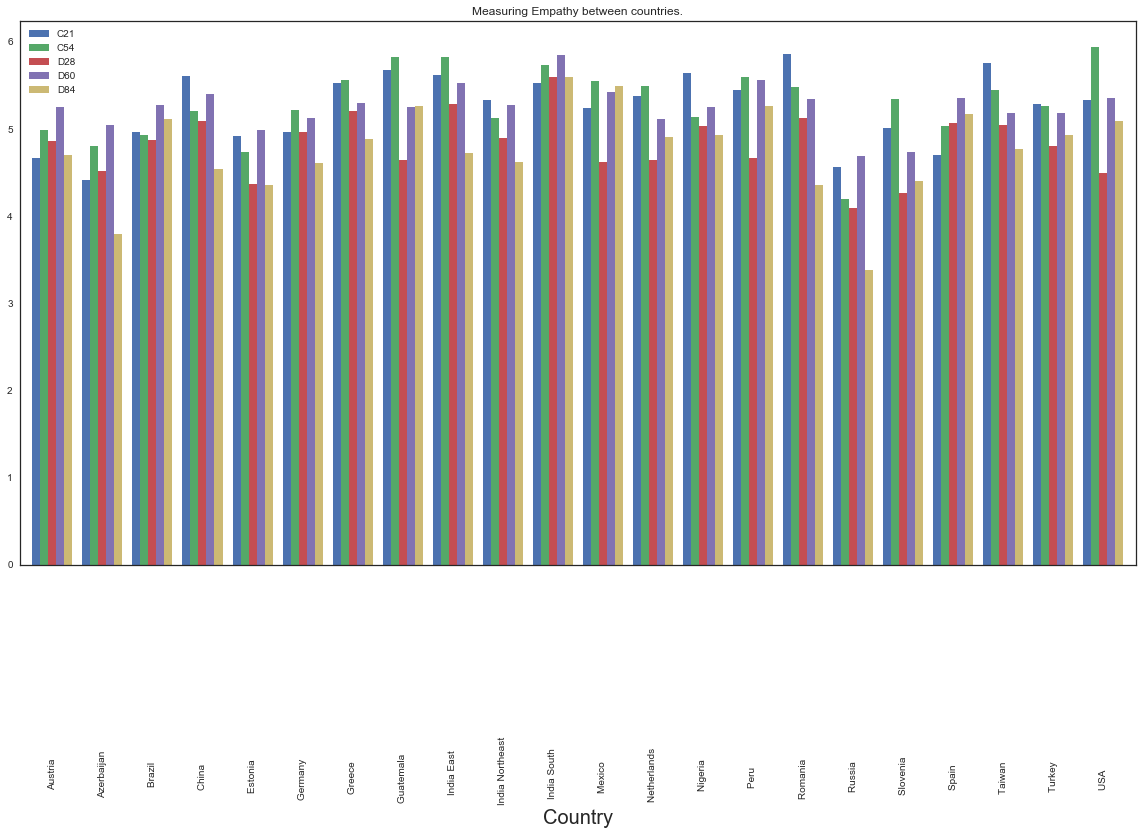

In [25]:
# Humane Orientation (Empathy)
Empathy_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C21', 'C54']]
Empathy_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D28', 'D60', 'D84']]
Empathy_D.rename(columns={"couname":"Couname"},inplace=True)
Empathy = pd.merge(Empathy_C, Empathy_D)
Empathy.set_index("Couname", inplace=True)
Empathy.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Empathy between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

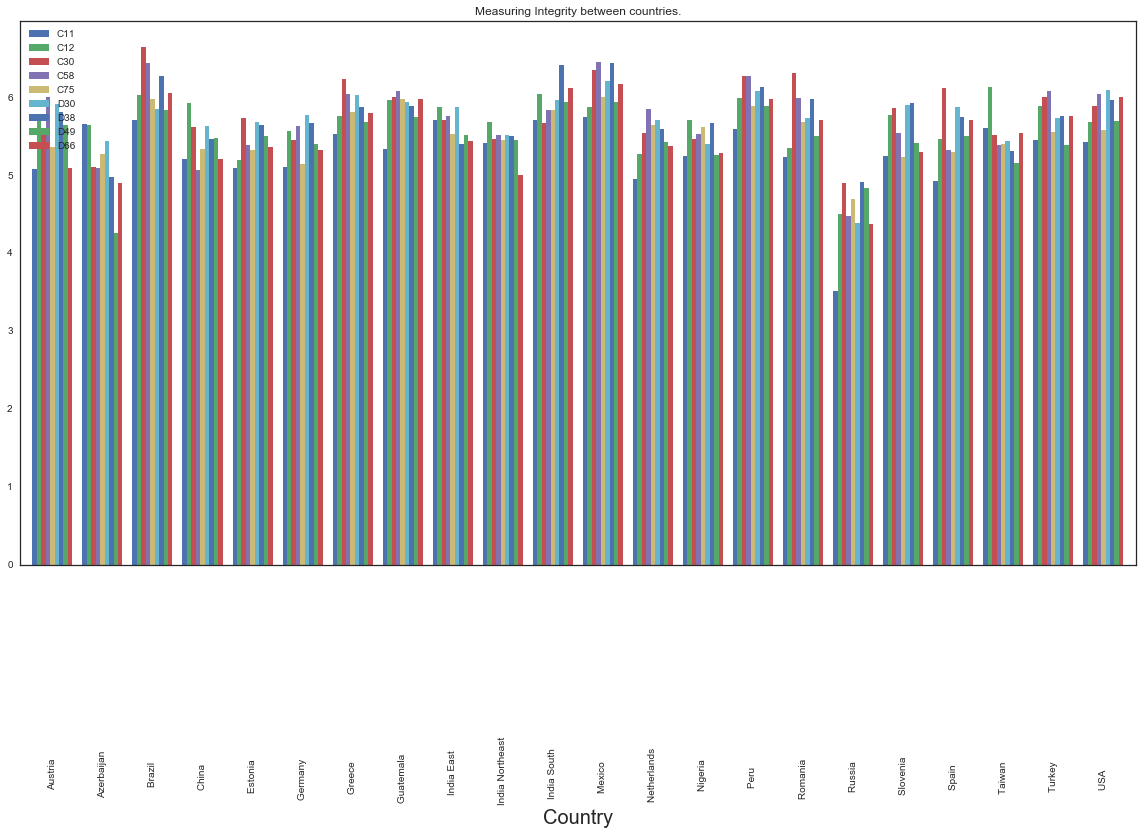

In [26]:
# Integrity
Integrity_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C11', 'C12', 'C30', 'C58', 'C75']]
Integrity_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D30', 'D38', 'D49', 'D66']]
Integrity_D.rename(columns={"couname":"Couname"},inplace=True)
Integrity = pd.merge(Integrity_C, Integrity_D)
Integrity.set_index("Couname", inplace=True)
Integrity.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Integrity between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

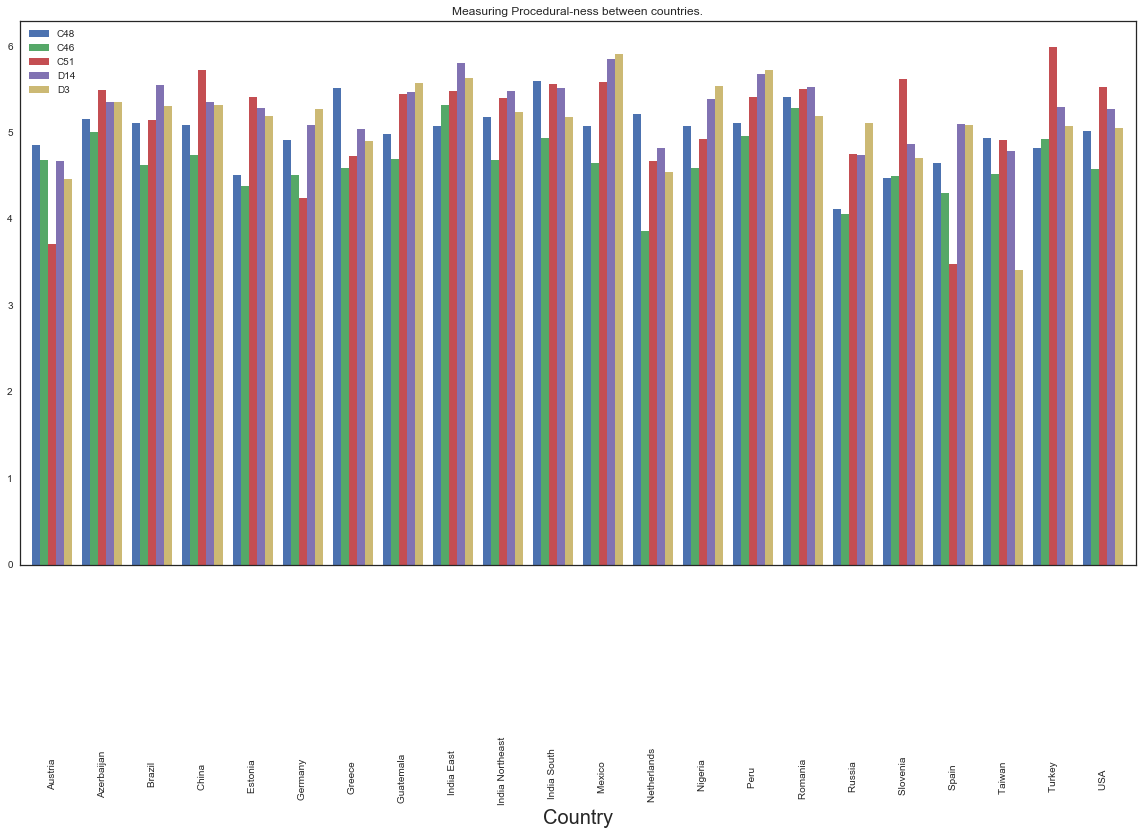

In [27]:
# Procedural
Procedural_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C48', 'C46', 'C51']]
Procedural_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D14', 'D3']]
Procedural_D.rename(columns={"couname":"Couname"},inplace=True)
Procedural = pd.merge(Procedural_C, Procedural_D)
Procedural.set_index("Couname", inplace=True)
Procedural.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Procedural-ness between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [28]:
# Admin
Admin_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C4', 'C39', 'C5']]
Admin_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D4', 'D18', 'D74']]
Admin_D.rename(columns={"couname":"Couname"},inplace=True)0
Admin = pd.merge(Admin_C, Admin_D)
Admin.set_index("Couname", inplace=True)
Admin.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Administration level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

SyntaxError: invalid syntax (<ipython-input-28-b450fb54914b>, line 4)

In [ ]:
# SelfCentered
SelfCentered = C_Grouped_Country_Avg.reset_index()[['Couname', 'C8', 'C34', 'C44', 'C77']]
SelfCentered.set_index("Couname", inplace=True)
SelfCentered.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Self Centered level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [ ]:
# Autonomy
Autonomy_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C42', 'C61']]
Autonomy_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D12']]
Autonomy_D.rename(columns={"couname":"Couname"},inplace=True)
Autonomy = pd.merge(Autonomy_C, Autonomy_D)
Autonomy.set_index("Couname", inplace=True)
Autonomy.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Autonomy level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [ ]:
# Inspiration
Inspiration_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C36', 'C41', 'C43', 'C82']]
Inspiration_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D1', 'D6', 'D11']]
Inspiration_D.rename(columns={"couname":"Couname"},inplace=True)
Inspiration = pd.merge(Inspiration_C, Inspiration_D)
Inspiration.set_index("Couname", inplace=True)
Inspiration.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Inspiration level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [ ]:
# PerformanceOrientedLevel
PerformanceOrientedLevel_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C6', 'C60', 'C10']]
PerformanceOrientedLevel_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D5', 'D29', 'D16', 'D79']]
PerformanceOrientedLevel_D.rename(columns={"couname":"Couname"},inplace=True)
PerformanceOrientedLevel = pd.merge(PerformanceOrientedLevel_C, PerformanceOrientedLevel_D).set_index(
    "Couname").plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Performance Oriented Level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [ ]:
# CONSCIOUSNESS
CONSCIOUSNESS_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C15', 'C40']]
CONSCIOUSNESS_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D31', 'D10', 'D59']]
CONSCIOUSNESS_D.rename(columns={"couname":"Couname"},inplace=True)
CONSCIOUSNESS = pd.merge(CONSCIOUSNESS_C, CONSCIOUSNESS_D).set_index(
    "Couname").plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring CONSCIOUSNESS Level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [ ]:
# Malevolent
Malevolent_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C28', 'C27', 'C33', 'C59']]
Malevolent_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D22', 'D41', 'D48']]
Malevolent_D.rename(columns={"couname":"Couname"},inplace=True)
Malevolent = pd.merge(Malevolent_C, Malevolent_D).set_index(
    "Couname").plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Malevolent Level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [ ]:
# INTEGRATING
INTEGRATING_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C16', 'C19', 'C26', 'C64', 'C67']]
INTEGRATING_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D33', 'D72', 'D54']]
INTEGRATING_D.rename(columns={"couname":"Couname"},inplace=True)
INTEGRATING = pd.merge(INTEGRATING_C, INTEGRATING_D).set_index(
    "Couname").plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring INTEGRATING Level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

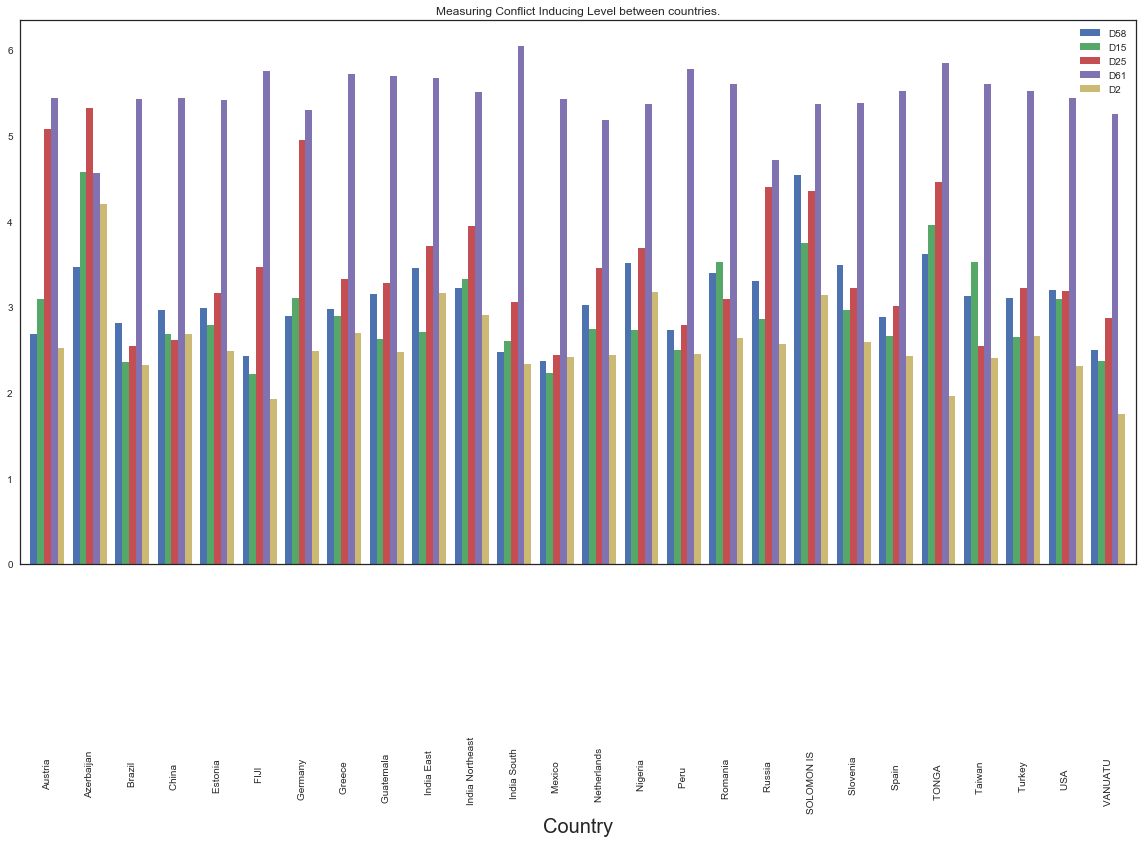

In [29]:
# ConflictInducing
ConflictInducing = D_Grouped_Country_Avg.reset_index()[['couname', 'D58', 'D15', 'D25', 'D61', 'D2']]
ConflictInducing.set_index("couname", inplace=True)
ConflictInducing.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Conflict Inducing Level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)


In [30]:
# STOPPED AT COMMITMENT LEVEL on page 6/9

### Maching Learning (C Data)

In [31]:
# Set up training and validation sets
X = C_Grouped_Country_Avg.drop(['GEI', 'GDP'], axis=1) # Training & Validation data
Y = C_Grouped_Country_Avg[["GEI", 'GDP']]              # Response / Target Variable

print(X.shape, Y.shape)

(26, 87) (26, 2)


In [32]:
# Split training set so that we validate on 20% of the data
# Note that our algorithms will never have seen the validation 
# data during training. This is to evaluate how good our estimators are.

np.random.seed(1337) # set random seed for reproducibility

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(20, 87) (20, 2)
(6, 87) (6, 2)


In [33]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=500)   # instantiate
random_forest.fit(X_train, Y_train)                         # fit
acc_rf = random_forest.score(X_val, Y_val)                  # predict + evaluate

print('K-Nearest Neighbors labeling accuracy:', str(round(acc_rf*100,2)),'%')

K-Nearest Neighbors labeling accuracy: 63.62 %


Training accuracy Random Forest for C Data: 0.895248584479


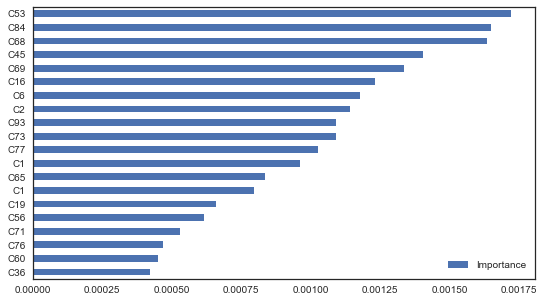

In [34]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 20 ].plot( kind = 'barh' )
    print ('Training accuracy Random Forest for C Data:',model.score( X , y ))

plot_model_var_imp(random_forest, X_train, Y_train)

### Machine Learning (D-Data)

In [35]:
# Set up training and validation sets
X = D_Grouped_Country_Avg.drop(['GEI', 'GDP'], axis=1) # Training & Validation data
Y = D_Grouped_Country_Avg[["GEI", 'GDP']]              # Response / Target Variable

print(X.shape, Y.shape)

(26, 85) (26, 2)


In [36]:
# Split training set so that we validate on 20% of the data
# Note that our algorithms will never have seen the validation 
# data during training. This is to evaluate how good our estimators are.

np.random.seed(1337) # set random seed for reproducibility

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(20, 85) (20, 2)
(6, 85) (6, 2)


In [37]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=500)   # instantiate
random_forest.fit(X_train, Y_train)                         # fit
acc_rf = random_forest.score(X_val, Y_val)                  # predict + evaluate

print('K-Nearest Neighbors labeling accuracy:', str(round(acc_rf*100,2)),'%')

K-Nearest Neighbors labeling accuracy: 25.03 %


Training accuracy Random Forest for D Data: 0.874264264902


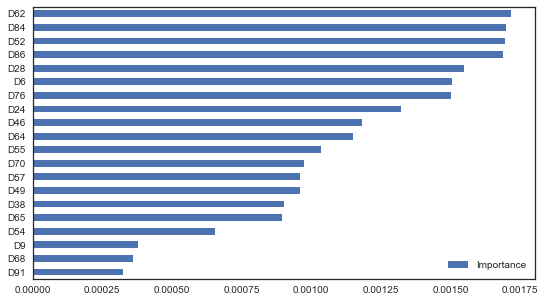

In [38]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 20 ].plot( kind = 'barh' )
    print ('Training accuracy Random Forest for D Data:',model.score( X , y ))

plot_model_var_imp(random_forest, X_train, Y_train)